# Analiza 1000 družabnih iger z najvišjo oceno strani
Poglejmo si podatke o tisoč družabnih igrah z najvišjo oceno strani na spletni strani [BoardGameGeek](https://boardgamegeek.com/browse/boardgame).

### 1. Začetne priprave
Uvozimo ustrezne pakete ter datoteko za analizo strani. V datoteki igre.csv so za vsako družabno igro shranjeni naslednji podatki:
- rang (mesto na seznamu, glede na oceno strani), 
- naslov,
- opis,
- leto nastanka,
- ocena strani,
- povprečna ocena in
- število glasov.

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 10)

In [97]:
igre = pd.read_csv('igre.csv', index_col="rang")

V tabelo še dodamo en stolpec s podatkom o desetletju izida, ki nam bo pomagal pri analizi podatkov.

In [98]:
def izracunaj_desetletje(stevilo):
    return 10 * (stevilo // 10)

igre['desetletje'] = igre['leto'].apply(izracunaj_desetletje)

Poglejmo si kako zdaj zgleda tabela.

In [99]:
igre

,ime,leto,opis,ocena_strani,povprecna_ocena,stevilo_glasov,desetletje
rang,,,,,,,
1,Brass: Birmingham,2018,"Build networks, grow industries, and navigate ...",8.414,8.59,47473,2010
2,Pandemic Legacy: Season 1,2015,Mutating diseases are spreading around the wor...,8.376,8.52,54001,2010
3,Gloomhaven,2017,Vanquish monsters with strategic cardplay. Ful...,8.346,8.58,62863,2010
4,Ark Nova,2021,"Plan and build a modern, scientifically manage...",8.338,8.54,45614,2020
5,Twilight Imperium: Fourth Edition,2017,"Build an intergalactic empire through trade, r...",8.238,8.59,24348,2010
...,...,...,...,...,...,...,...
996,Stella: Dixit Universe,2021,Players confront each other with word-images a...,6.619,7.31,3626,2020
997,Tragedy Looper,2011,"Players live, die, and repeat in order to outw...",6.619,7.18,4603,2010
998,Call to Adventure,2019,"Hero or Foe? You decide in this tile chucking,...",6.619,7.08,6408,2010


Preverimo če je na seznamu tudi ena mojih najljubših družabnih iger _Carcassonne_.

In [100]:
igre[igre['ime'] == 'Carcassonne']

,ime,leto,opis,ocena_strani,povprecna_ocena,stevilo_glasov,desetletje
rang,,,,,,,
226,Carcassonne,2000,"Shape the medieval landscape of France, claimi...",7.296,7.41,128488,2000


## Najboljših 10
Za začetek si poglejmo najbolših deset iger iz različnih kategorij.

Deset iger z najboljšo oceno strani:

In [127]:
igre.head(10)

,ime,leto,opis,ocena_strani,povprecna_ocena,stevilo_glasov,desetletje
rang,,,,,,,
1,Brass: Birmingham,2018,"Build networks, grow industries, and navigate ...",8.414,8.59,47473,2010
2,Pandemic Legacy: Season 1,2015,Mutating diseases are spreading around the wor...,8.376,8.52,54001,2010
3,Gloomhaven,2017,Vanquish monsters with strategic cardplay. Ful...,8.346,8.58,62863,2010
4,Ark Nova,2021,"Plan and build a modern, scientifically manage...",8.338,8.54,45614,2020
5,Twilight Imperium: Fourth Edition,2017,"Build an intergalactic empire through trade, r...",8.238,8.59,24348,2010
6,Dune: Imperium,2020,"Influence, intrigue, and combat in the univers...",8.231,8.43,47297,2020
7,Terraforming Mars,2016,Compete with rival CEOs to make Mars habitable...,8.208,8.36,100816,2010
8,War of the Ring: Second Edition,2011,The Fellowship and the Free Peoples clash with...,8.189,8.54,21847,2010
9,Star Wars: Rebellion,2016,Strike from your hidden base as the Rebels—or ...,8.170,8.42,33003,2010


Deset iger z najboljšo povprečno oceno:

In [129]:
igre.sort_values('povprecna_ocena', ascending=False).head(10)

,ime,leto,opis,ocena_strani,povprecna_ocena,stevilo_glasov,desetletje
rang,,,,,,,
659,Aeon Trespass: Odyssey,2022,"Tame the Titans! Arm, evolve and pilot them to...",6.844,9.03,2269,2020
63,Oathsworn: Into the Deepwood,2022,Fight for humanity&#039;s survival against unn...,7.697,8.96,5050,2020
25,Frosthaven,2022,Adventure in the frozen north and build up you...,7.906,8.82,7340,2020
254,Slay the Spire: The Board Game,2024,"Craft a unique deck, discover powerful relics,...",7.252,8.81,2980,2020
39,Dune: Imperium – Uprising,2023,"Deploy agents, build your deck, and engage in ...",7.801,8.74,6220,2020
186,Ticket to Ride Legacy: Legends of the West,2023,Build train lines across the United States in ...,7.376,8.73,3119,2020
173,Too Many Bones: Undertow,2018,Songstress Stanza &amp; stealthy Duster board ...,7.391,8.69,3433,2010
86,Age of Innovation,2023,Terraform the world to expand your faction and...,7.594,8.67,4518,2020
291,Arkham Horror: The Card Game (Revised Edition),2021,Revised core set repackages the original with ...,7.194,8.65,2850,2020


Deset iger z največjim številom glasov:

In [128]:
igre.sort_values('stevilo_glasov', ascending=False).head(10)

,ime,leto,opis,ocena_strani,povprecna_ocena,stevilo_glasov,desetletje
rang,,,,,,,
556,CATAN,1995,Collect and trade resources to build up the is...,6.919,7.10,129381,1990
226,Carcassonne,2000,"Shape the medieval landscape of France, claimi...",7.296,7.41,128488,2000
150,Pandemic,2008,Your team of experts must prevent the world fr...,7.426,7.53,126763,2000
95,7 Wonders,2010,Draft cards to develop your ancient civilizati...,7.570,7.68,105660,2010
7,Terraforming Mars,2016,Compete with rival CEOs to make Mars habitable...,8.208,8.36,100816,2010
19,7 Wonders Duel,2015,Science? Military? What will you draft to win ...,7.970,8.09,96361,2010
30,Wingspan,2019,Attract a beautiful and diverse collection of ...,7.891,8.04,95574,2010
141,Codenames,2015,Give your team clever one-word clues to help t...,7.446,7.54,93419,2010
79,Azul,2017,Artfully embellish the walls of your palace by...,7.633,7.74,92568,2010


## Analiza družabnih iger po desetletjih
V tem razdelku si podrobneje poglejmo igre v treh desetletjih:
- družabne igre med 1990-1999
- družabne igre med 2000-2009
- družabne igre med 2010-2019


### Družabne igre med 1990-1999
Poglejmo si družabne igre v tem desetletju, razvrščene glede na število glasov.

In [101]:
igre_90ta = igre[igre['desetletje'] == 1990]
najbolj_glasovane_igre = igre_90ta.sort_values(by='stevilo_glasov', ascending=False)
najbolj_glasovane_igre

,ime,leto,opis,ocena_strani,povprecna_ocena,stevilo_glasov,desetletje
rang,,,,,,,
556,CATAN,1995,Collect and trade resources to build up the is...,6.919,7.10,129381,1990
527,Bohnanza,1997,"Farm beans, harvest crops and trade your way t...",6.946,7.06,47284,1990
330,Lost Cities,1999,"Set out on expeditions, but will your findings...",7.139,7.24,47096,1990
167,Magic: The Gathering,1993,Cast spells and summon fantasy monsters in the...,7.401,7.58,40227,1990
335,For Sale,1997,What&#039;s your bid? Bid on promising propert...,7.134,7.26,31474,1990
...,...,...,...,...,...,...,...
924,ZÈRTZ,1999,Sacrifice pieces to your opponent in order to ...,6.664,7.26,4381,1990
980,Union Pacific,1999,Will you increase the value of railways you ha...,6.632,7.19,4358,1990
725,The Republic of Rome,1990,Politicians cooperate and compete over persona...,6.788,7.54,4221,1990


Primerjamo igri, ki sta na vrhu in dnu seznama.

In [102]:
igre.iloc[555]

ime                                                            CATAN
leto                                                            1995
opis               Collect and trade resources to build up the is...
ocena_strani                                                   6.919
povprecna_ocena                                                  7.1
stevilo_glasov                                                129381
desetletje                                                      1990
Name: 556, dtype: object

In [103]:
igre.iloc[633]

ime                                                    Roads & Boats
leto                                                            1999
opis               Develop a logistical network from pack animals...
ocena_strani                                                   6.862
povprecna_ocena                                                  7.7
stevilo_glasov                                                  3432
desetletje                                                      1990
Name: 634, dtype: object

Igra z največjim številom glasov je CATAN, igra z najmanj pa je Roads & Boats. Igra Catan ima 129381 glasov, Roads & Boats pa le 3432. Kljub temu ima prva nižjo povprečno oceno, kot druga. Menim, da je razlog tega v prepoznavnost igre. To pomeni, da je to igro preizkusilo bistveno več igralcev in med njimi tudi tisti, ki ne marajo takega žanra iger. Tako ima igra Roads & Boats višjo povprečno oceno za kar 0,6. Vselej pa je spletna stran BoardGameGeek višjo oceno strani dodelila CATANu.

Poglejmo si še v kateri polovici devetdesetih so izšle bolj prepoznavne igre.

In [104]:
zgodnja_90ta = igre_90ta[igre_90ta['leto'] < 1995]
pozna_90ta = igre_90ta[igre_90ta['leto'] >= 1995]

stevilo_glasov_zgodnja = zgodnja_90ta['stevilo_glasov'].sum()
stevilo_glasov_pozna = pozna_90ta['stevilo_glasov'].sum()

print("Skupno število glasov za zgodnja 90-ta:", stevilo_glasov_zgodnja)
print("Skupno število glasov za pozna 90-ta:", stevilo_glasov_pozna)

Skupno število glasov za zgodnja 90-ta: 142234
Skupno število glasov za pozna 90-ta: 507692


Večje število glasov so dobile igre v poznih 90ih. Poglejmo si še koliko je povprečno število glasov v polovicah. 

In [105]:
povp_glasovi_zgodnja = stevilo_glasov_zgodnja / len(zgodnja_90ta)
povp_glasovi_pozna = stevilo_glasov_pozna / len(pozna_90ta)
print("Povprečno število glasov na igro v zgodnjih 90tih:", povp_glasovi_zgodnja)
print("Povprečno število glasov na igro v poznih 90tih:", povp_glasovi_pozna)

Povprečno število glasov na igro v zgodnjih 90tih: 20319.14285714286
Povprečno število glasov na igro v poznih 90tih: 20307.68


Po povprečni oceni pa vidimo, da je v vsaki skupini nekaj bolj glasovanih in manj glasovanih iger. Tako ne moramo reči, da so igre v katerem obdobju bolj priljubljene.

### Družabne igre med 2000-2009

Poglejmo si družabne igre iz tega desetletja. Gledali nomo igre, ki imajo vsaj 40000 glasov.

In [106]:
igre_00 = igre[igre['desetletje'] == 2000]
igre_00

,ime,leto,opis,ocena_strani,povprecna_ocena,stevilo_glasov,desetletje
rang,,,,,,,
13,Twilight Struggle,2005,Relive the Cold War and rewrite history in an ...,8.066,8.24,49205,2000
20,Brass: Lancashire,2007,Test your economic mettle as you build and net...,7.963,8.20,25226,2000
45,Puerto Rico,2002,"Ship goods, construct buildings, and choose ro...",7.773,7.91,71391,2000
54,Agricola,2007,Build your farmstead by sowing fields and rais...,7.745,7.87,73272,2000
62,Power Grid,2004,"Bid, network, and manage resources in a race t...",7.697,7.81,65943,2000
...,...,...,...,...,...,...,...
976,Conflict of Heroes: Awakening the Bear! – Russ...,2008,Fast-paced tactical wargame of the Eastern Fro...,6.633,7.50,3069,2000
977,Napoleon's Triumph,2007,A tactical-level block wargame simulating the ...,6.633,8.00,1837,2000
978,Last Night on Earth: The Zombie Game,2007,A handful of survivors aim to survive the nigh...,6.632,6.91,14155,2000


Od teh iger preverimo v katerem letu jih je nastalo koliko. Izračunamo še povprečno oceno strani v letu.

In [107]:
seznam_po_letih = igre_00.groupby('leto').agg({
    'ocena_strani': 'mean',
}).sort_index()
seznam_po_letih['stevilo_iger'] = igre_00.groupby('leto').size()
seznam_po_letih


,ocena_strani,stevilo_iger
leto,,
2000,6.982714,7
2001,6.826500,4
2002,7.030000,7
2003,6.887286,7
2004,6.958227,22
2005,7.081889,18
2006,7.040400,15
2007,7.002640,25
2008,7.092667,15


Predstavimo še to z grafom za lažjo vizualizacijo.

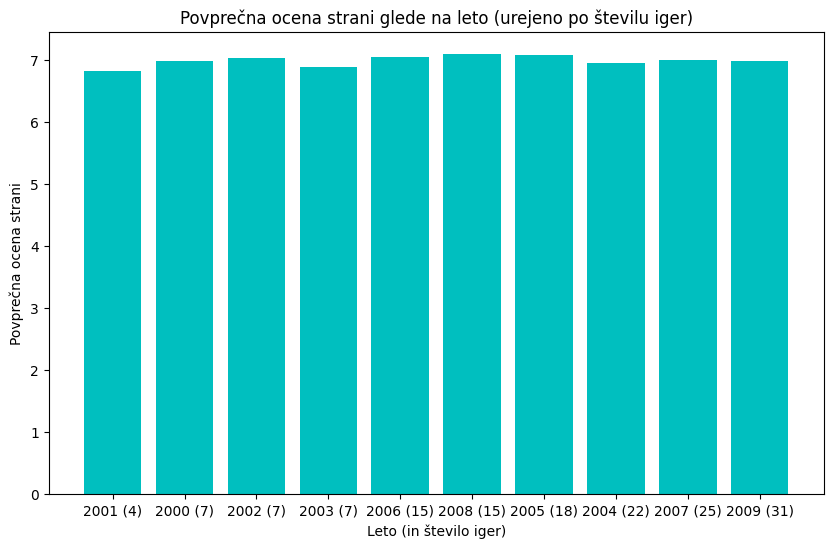

In [108]:
seznam_po_letih_2 = seznam_po_letih.sort_values('stevilo_iger')

# Priprava oznak z letom in številom iger
x_labels = [f'{leto} ({stevilo})' for leto, stevilo in zip(seznam_po_letih_2.index, seznam_po_letih_2['stevilo_iger'])]

plt.figure(figsize=(10, 6))
plt.bar(x_labels, seznam_po_letih_2['ocena_strani'], color='c')

plt.title('Povprečna ocena strani glede na leto (urejeno po številu iger)')
plt.xlabel('Leto (in število iger)')
plt.ylabel('Povprečna ocena strani')

plt.show()


V grafu vidimo, da imajo igre v letih kjer jih je manj, višjo povprečno oceno strani. 

### Družabne igre med 2010-2019
Za to desetletje si bomo pobližje ogledali igre z več kot 40000 glasovi. Združili bomo podatka o oceni strani in povprečni oceni ter tako ocenili katere so najboljše igre v tem desetletju.

In [109]:
igre_10 = igre[igre['desetletje'] == 2010]
igre_10 = igre_10[igre_10['stevilo_glasov'] > 40000]
igre_10

,ime,leto,opis,ocena_strani,povprecna_ocena,stevilo_glasov,desetletje
rang,,,,,,,
1,Brass: Birmingham,2018,"Build networks, grow industries, and navigate ...",8.414,8.59,47473,2010
2,Pandemic Legacy: Season 1,2015,Mutating diseases are spreading around the wor...,8.376,8.52,54001,2010
3,Gloomhaven,2017,Vanquish monsters with strategic cardplay. Ful...,8.346,8.58,62863,2010
7,Terraforming Mars,2016,Compete with rival CEOs to make Mars habitable...,8.208,8.36,100816,2010
11,Spirit Island,2017,Island Spirits join forces using elemental pow...,8.144,8.34,53016,2010
...,...,...,...,...,...,...,...
435,King of Tokyo,2011,Prove your dominance by destroying Tokyo or by...,7.029,7.13,71401,2010
542,Hanabi,2010,Give hints to create sets of fireworks and try...,6.935,7.04,48965,2010
597,Sushi Go!,2013,"Pass the sushi around, but keep the best for y...",6.890,7.00,47683,2010


In [110]:
igre_10['skupna_ocena'] = igre_10['ocena_strani'] + igre_10['povprecna_ocena']
top_10_igre = igre_10.sort_values(by='skupna_ocena', ascending=False).head(10)
top_10_igre

,ime,leto,opis,ocena_strani,povprecna_ocena,stevilo_glasov,desetletje,skupna_ocena
rang,,,,,,,,
1,Brass: Birmingham,2018,"Build networks, grow industries, and navigate ...",8.414,8.59,47473,2010,17.004
3,Gloomhaven,2017,Vanquish monsters with strategic cardplay. Ful...,8.346,8.58,62863,2010,16.926
2,Pandemic Legacy: Season 1,2015,Mutating diseases are spreading around the wor...,8.376,8.52,54001,2010,16.896
7,Terraforming Mars,2016,Compete with rival CEOs to make Mars habitable...,8.208,8.36,100816,2010,16.568
11,Spirit Island,2017,Island Spirits join forces using elemental pow...,8.144,8.34,53016,2010,16.484
15,Great Western Trail,2016,Use strategic outposts and navigate danger as ...,8.020,8.19,41266,2010,16.210
16,The Castles of Burgundy,2011,"Plan, trade, and build your Burgundian estate ...",8.016,8.14,63140,2010,16.156
17,Scythe,2016,"Five factions vie for dominance in a war-torn,...",7.986,8.14,84749,2010,16.126
19,7 Wonders Duel,2015,Science? Military? What will you draft to win ...,7.970,8.09,96361,2010,16.060


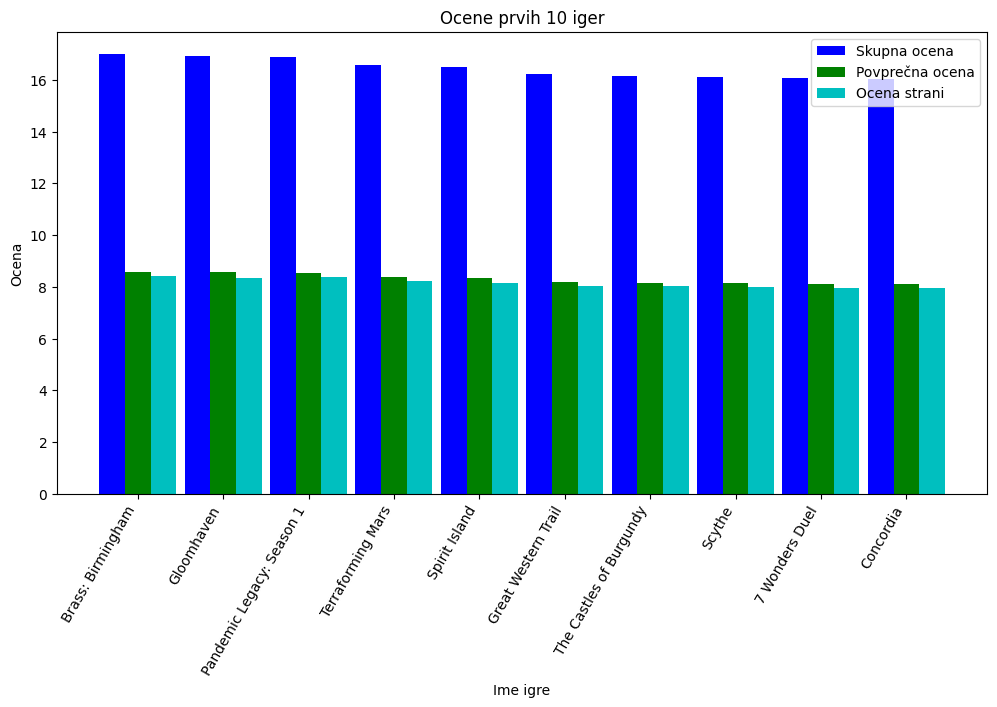

In [111]:
labels = top_10_igre['ime']
skupna_ocena = top_10_igre['skupna_ocena']
povprecna_ocena = top_10_igre['povprecna_ocena']
ocena_strani = top_10_igre['ocena_strani']

x = np.arange(len(labels))  # Ustvarimo pozicije za x-os
width = 0.3  # Širina stolpcev

# Risanje stolpičnega grafa
plt.figure(figsize=(12, 6))
plt.bar(x - width, skupna_ocena, width, label='Skupna ocena', color='b')
plt.bar(x, povprecna_ocena, width, label='Povprečna ocena', color='g')
plt.bar(x + width, ocena_strani, width, label='Ocena strani', color='c')

# Dodajanje oznak in naslova
plt.title('Ocene prvih 10 iger')
plt.xlabel('Ime igre')
plt.ylabel('Ocena')
plt.xticks(x, labels, rotation=60, ha='right')
plt.legend()

plt.show()


## Hipoteze
V tem razdelku si bomo ogledali naslednje hipoteze:

- igre z več glasovi imajo višjo povprečno oceno,
- največ iger izmed je izšlo v prejšnjem desetletju,
- izdane po letu 2010 imajo večjo povprečno oceno od ostalih,
- igre z višjo oceno strani imajo višjo povprečno oceno,
- igre z daljšimi opisi imajo več glasov kot igre s krajšimi opisi

ter preverili njihovo resničnost.

## Igre z več glasovi imajo višjo povprečno oceno.
Poglejmo si kako število glasov, ki jih je dobila igra vpliva na povprečno oceno. Oziroma lahko si pogledamo, če je med tema podatkoma sploh kakšna povezava. Podatke o igrah razvrstimo na 50 podskupin glede na število glasov pri igri. Tako bodo v podskupini 0 igre, katere so izmed vseh dobile najmanj glasov, v podskupini 49 pa te z največ glasovi.

In [112]:
igre_1 = igre.copy()
igre_1['glasovi_na_50_delov'] = pd.qcut(igre_1['stevilo_glasov'], 50, labels=False)
povprecja_po_delih = igre_1.groupby('glasovi_na_50_delov', observed=True)['povprecna_ocena'].mean()
igre_1['Povprecna_ocena_po_delih'] = igre_1['glasovi_na_50_delov'].map(povprecja_po_delih)
igre_1


,ime,leto,opis,ocena_strani,povprecna_ocena,stevilo_glasov,desetletje,glasovi_na_50_delov,Povprecna_ocena_po_delih
rang,,,,,,,,,
1,Brass: Birmingham,2018,"Build networks, grow industries, and navigate ...",8.414,8.59,47473,2010,47,7.649000
2,Pandemic Legacy: Season 1,2015,Mutating diseases are spreading around the wor...,8.376,8.52,54001,2010,48,7.772000
3,Gloomhaven,2017,Vanquish monsters with strategic cardplay. Ful...,8.346,8.58,62863,2010,48,7.772000
4,Ark Nova,2021,"Plan and build a modern, scientifically manage...",8.338,8.54,45614,2020,47,7.649000
5,Twilight Imperium: Fourth Edition,2017,"Build an intergalactic empire through trade, r...",8.238,8.59,24348,2010,43,7.567500
...,...,...,...,...,...,...,...,...,...
996,Stella: Dixit Universe,2021,Players confront each other with word-images a...,6.619,7.31,3626,2020,6,7.607000
997,Tragedy Looper,2011,"Players live, die, and repeat in order to outw...",6.619,7.18,4603,2010,12,7.455000
998,Call to Adventure,2019,"Hero or Foe? You decide in this tile chucking,...",6.619,7.08,6408,2010,20,7.410000


Da si dobljene rezultate lažje predstavljamo, iz njih naredimo graf o povprečni oceni za posamezno podskupino.

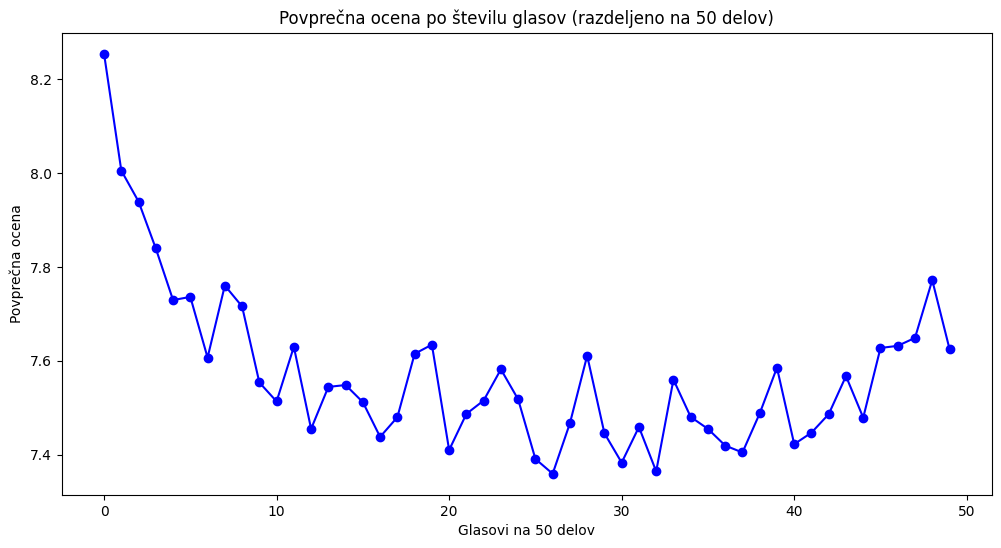

In [113]:


plt.figure(figsize=(12,6))
plt.plot(povprecja_po_delih.index, povprecja_po_delih.values, marker='o', linestyle='-', color='b')
plt.xlabel('Glasovi na 50 delov')
plt.ylabel('Povprečna ocena')
plt.title('Povprečna ocena po številu glasov (razdeljeno na 50 delov)')
plt.show()


S prikazanim grafom je jasno, da z večjim številom glasov ne narašča tudi povprečna ocena igre. Vidi se tudi, da med danima podatkoma ni neke povezave.

Lahko se dodatno prepričamo, če obstaja kakšna linearna povezava med številom glasov in povprečno oceno, zato bomo izračunali korelacijski koeficient. Če je korelacijski koeficient blizu 1, obstaja močna pozitivna linearna povezava, ki bi podprla hipotezo.
Če je korelacija blizu 0, ni jasne linearne povezave. Če je korelacija negativna, potem igre z več glasovi nimajo višje povprečne ocene.

In [114]:
korelacija = igre_1['stevilo_glasov'].corr(igre_1['povprecna_ocena'])

print(f'Korelacija med številom glasov in povprečno oceno: {korelacija}')

Korelacija med številom glasov in povprečno oceno: -0.014803206586168495


Tudi korelacija nam pove, da ni jasne linearne povezave, zato lahko to hipotezo OVRŽEMO.



### Največ iger izmed je izšlo v prejšnjem desetletju.
Hipoteza trdi, da je na seznamu iger največ tistih, ki so nastale med letom 2010 in 2019. Za analizo te hipoteze najprej preštejemo koliko iger je nastalo v katerem desetletju.

In [115]:
st_iger_po_desetletjih = igre['desetletje'].value_counts().sort_index()
st_iger_po_desetletjih

desetletje
-2200      1
 1470      1
 1630      1
 1800      1
 1850      1
        ... 
 1980     11
 1990     32
 2000    151
 2010    575
 2020    221
Name: count, Length: 14, dtype: int64

Vidimo, da naša hipoteza velja. Podatke še lahko vizualiziramo, da bomo imeli boljšo predstavo kolikšen del iger pripada kateremu desetletju.

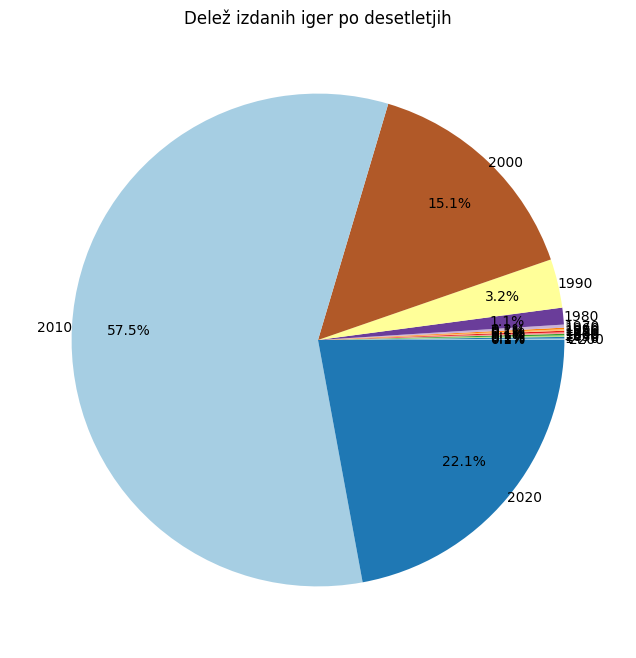

In [116]:
plt.figure(figsize=(8, 8))
plt.pie(st_iger_po_desetletjih,
        labels=st_iger_po_desetletjih.index,
        autopct='%1.1f%%',
        colors=plt.cm.Paired.colors,
        pctdistance=0.77,
        labeldistance=1.00
        )
plt.title('Delež izdanih iger po desetletjih')
plt.show()

V prejšnjem desetletju je nastalo več kot 50% iger izmed 1000 najbolje ocenjenih. Torej lahko hipotezo POTRDIMO.

### Igre izdane po letu 2010 imajo večjo povprečno oceno od ostalih.

In [117]:
#from scipy import stats

pred_2010 = igre[igre['leto'] <= 2010]
po_2010 = igre[igre['leto'] > 2010]


povp_pred_2010 = pred_2010['povprecna_ocena'].mean()
povp_po_2010 = po_2010['povprecna_ocena'].mean()

print(f"Povprečna ocena pred in leta 2010: {povp_pred_2010}")
print(f"Povprečna ocena po 2010: {povp_po_2010}")



Povprečna ocena pred in leta 2010: 7.39986956521739
Povprečna ocena po 2010: 7.623727272727273


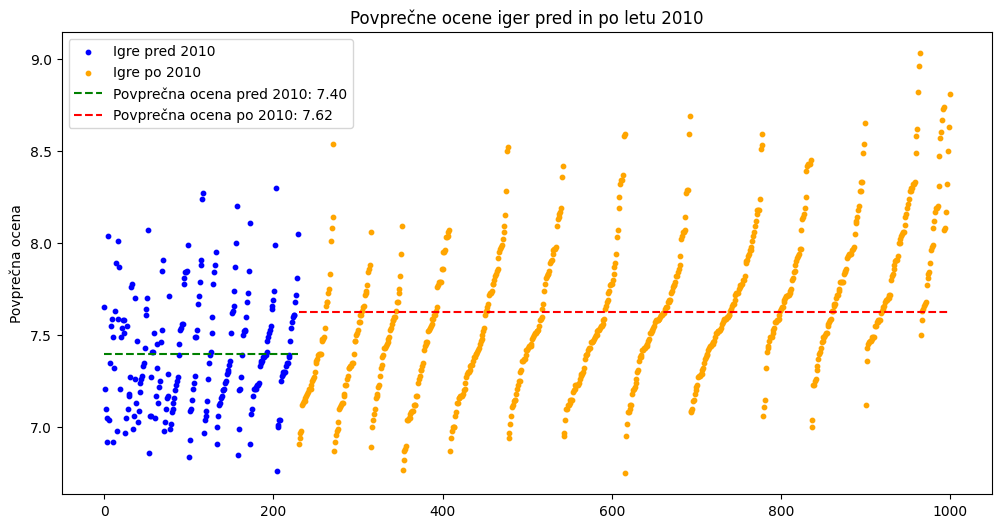

In [118]:
igre_2 = igre.sort_values(by=['leto', 'povprecna_ocena'], ascending=[True, True])


pred_2010 = igre_2[igre_2['leto'] <= 2010]
po_2010 = igre_2[igre_2['leto'] > 2010]


x_pred_2010 = range(0, len(pred_2010))  
x_po_2010 = range(len(pred_2010), len(pred_2010) + len(po_2010))  


plt.figure(figsize=(12, 6))
plt.scatter(x_pred_2010, pred_2010['povprecna_ocena'], color='blue', label='Igre pred 2010', s=10)


plt.scatter(x_po_2010, po_2010['povprecna_ocena'], color='orange', label='Igre po 2010', s=10)


povp_pred_2010 = pred_2010['povprecna_ocena'].mean()
povp_po_2010 = po_2010['povprecna_ocena'].mean()


plt.hlines(povp_pred_2010, xmin=0, xmax=len(pred_2010)-1, color='green', linestyle='--', label=f'Povprečna ocena pred 2010: {povp_pred_2010:.2f}')
plt.hlines(povp_po_2010, xmin=len(pred_2010), xmax=len(pred_2010) + len(po_2010)-1, color='red', linestyle='--', label=f'Povprečna ocena po 2010: {povp_po_2010:.2f}')


plt.ylabel('Povprečna ocena')
plt.title('Povprečne ocene iger pred in po letu 2010')


plt.legend()

plt.show()


## Igre z višjo oceno strani imajo višjo povprečno oceno.

Poglejmo si resničnost te trditve. 

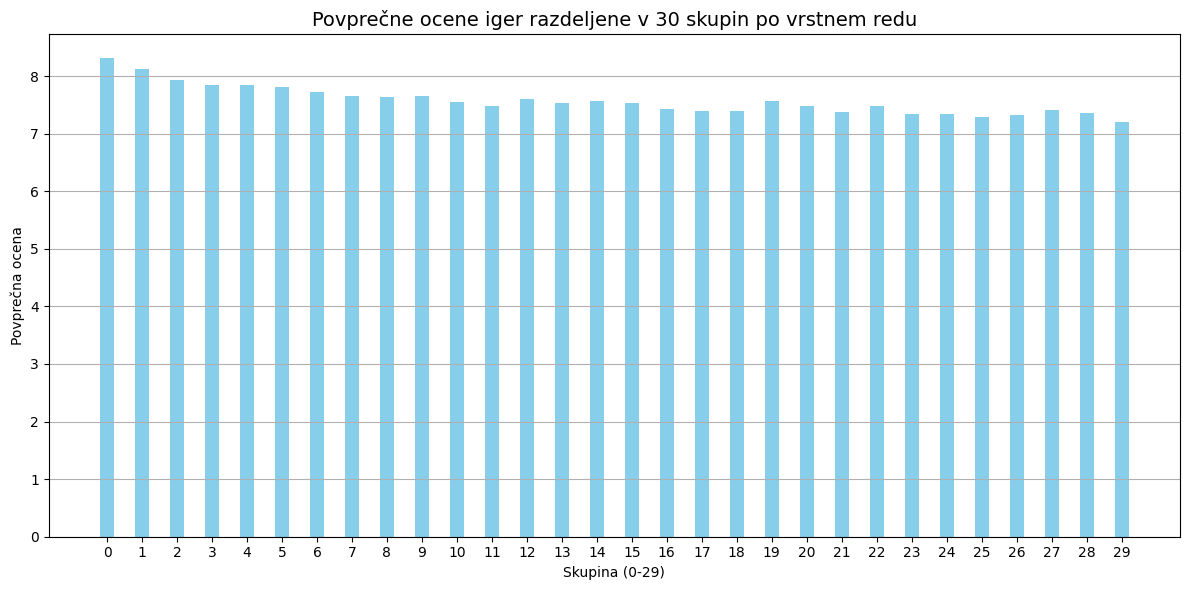

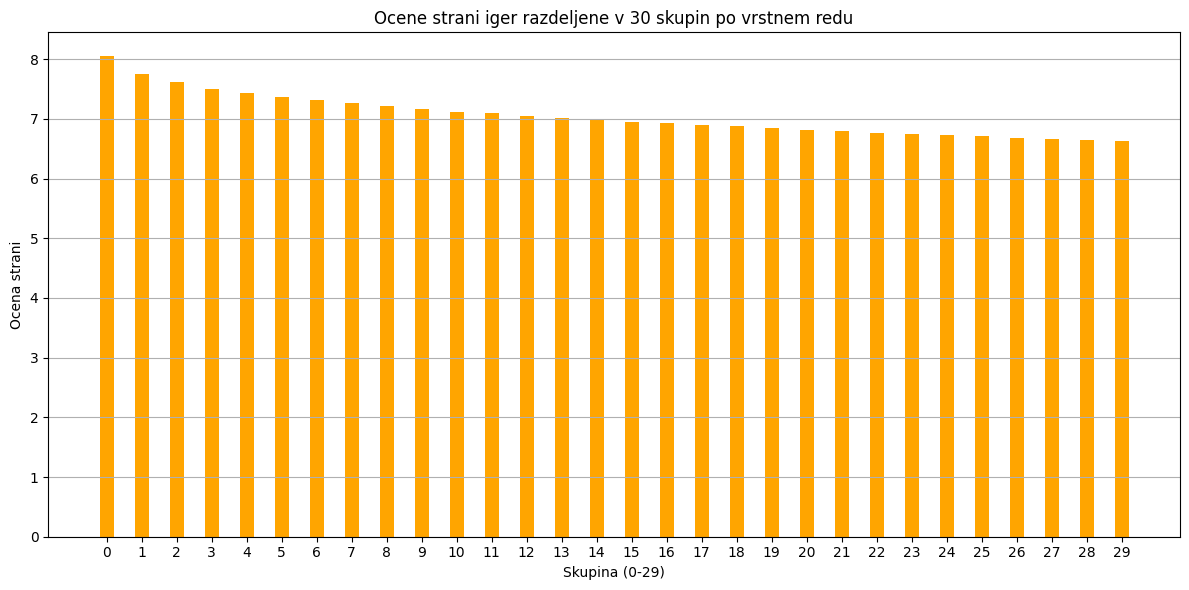

In [119]:
igre_3 = igre.copy()
igre_3['skupina'] = pd.cut(igre.index, bins=30, labels=False)

skupine_avg = igre_3.groupby('skupina').agg({'povprecna_ocena': 'mean', 'ocena_strani': 'mean'}).reset_index()


plt.figure(figsize=(12, 6))
plt.bar(skupine_avg['skupina'], skupine_avg['povprecna_ocena'], width=0.4, color='skyblue')
plt.xlabel('Skupina (0-29)')
plt.ylabel('Povprečna ocena')
plt.title('Povprečne ocene iger razdeljene v 30 skupin po vrstnem redu', fontsize=14)
plt.xticks(skupine_avg['skupina'])  
plt.grid(axis='y')  
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(skupine_avg['skupina'], skupine_avg['ocena_strani'], width=0.4, color='orange')
plt.xlabel('Skupina (0-29)')
plt.ylabel('Ocena strani')
plt.title('Ocene strani iger razdeljene v 30 skupin po vrstnem redu')
plt.xticks(skupine_avg['skupina'])  
plt.grid(axis='y')  
plt.tight_layout()
plt.show()

### Igre z daljšimi opisi imajo več glasov kot igre s krajšimi opisi.

Poglejmo si če ta trditev drži, torej če dolžina opisa vpliva na število glasov, ki jih ta igra prejme. Razdelili jih bomo po skupinah za lažjo analizo (glede na glasove) in v vsaki skupini izračunali povprečno dolžino opisa. Na koncu pa bomo podatke še narisali za lažjo predstavo.

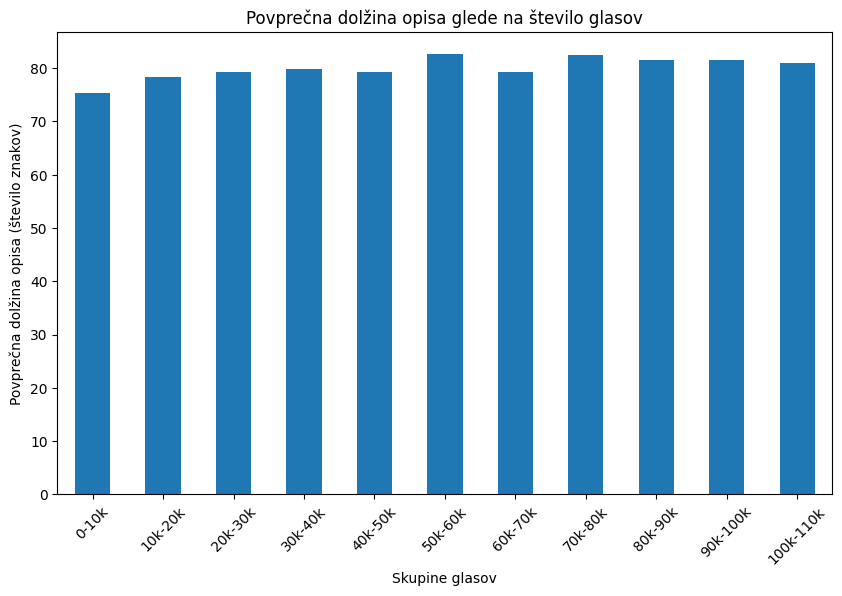

In [120]:
igre_4 = igre.copy()
igre_4['dolzina_opisa'] = igre_4['opis'].apply(len)

# Ustvari skupine glede na število glasov v razponih po 10.000
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000]
labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k', '100k-110k']
igre_4['glasovi_skupine'] = pd.cut(igre['stevilo_glasov'], bins=bins, labels=labels, include_lowest=True)

# Izračunaj povprečno dolžino opisa za vsako skupino glasov
povprecna_dolzina_opisa = igre_4.groupby('glasovi_skupine', observed=False)['dolzina_opisa'].mean()

# Graf
plt.figure(figsize=(10,6))
povprecna_dolzina_opisa.plot(kind='bar')
plt.title('Povprečna dolžina opisa glede na število glasov')
plt.xlabel('Skupine glasov')
plt.ylabel('Povprečna dolžina opisa (število znakov)')
plt.xticks(rotation=45)
plt.show()

Z vizualizacijo podatkov vidimo, da število znakov v opisu rahlo narašča z večjim številom glasov. A vsi opisi se razlikujejo za manj kot 10 znakov. S tem lahko sklepamo, da je na spletni strani BoardGameGeek omejena dolžina opisa za igro. Tako dolžina opisa družabne igre ne  mora vplivati na zanimanje uporabnikov te spletne strani, zato lahko to hipotezo OVRŽEMO. 